In [ ]:
# Install any packages (Colab usually has these already)
!pip install --quiet scikit-learn pandas matplotlib numpy

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# URL for processed Cleveland dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names (standard for the Cleveland dataset)
cols = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak", "slope",
    "ca", "thal", "target"
]

df = pd.read_csv(url, names=cols, na_values='?')
print("Loaded shape:", df.shape)
df.head(6)


Loaded shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
# Show missing values, dtypes and basic stats
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nValue counts for target (raw):\n", df['target'].value_counts())

# In Cleveland dataset, target values 0 = no disease, 1-4 = disease
# Convert to binary: 0 = no disease, 1 = disease
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

print("\nValue counts for target (binary):\n", df['target'].value_counts())

# Show numeric summary
df.describe().T



Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Data types:
 age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

Value counts for target (raw):
 target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

Value counts for target (binary):
 target
0    164
1    139
Name: count, dtype: int64


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

# Stratify by target to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))


Train shape: (242, 13) Test shape: (61, 13)
Train target distribution:
 target
0    0.541322
1    0.458678
Name: proportion, dtype: float64
Test target distribution:
 target
0    0.540984
1    0.459016
Name: proportion, dtype: float64


In [ ]:
def fit_and_evaluate_model(name, model, X_train, X_test, y_train, y_test):
    """Build pipeline with preprocessor -> model, fit, and evaluate metrics & plots"""
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = None
    try:
        y_proba = pipe.predict_proba(X_test)[:, 1]
    except Exception:
        # Some classifiers (e.g., SVC without probability=True) won't provide predict_proba
        if hasattr(pipe.named_steps['classifier'], "decision_function"):
            # Use decision function output for ROC if present
            y_proba = pipe.decision_function(X_test)
        else:
            y_proba = y_pred  # fallback (not ideal but keeps code robust)

    metrics = {
        "name": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {name}")
    print("Accuracy: {:.4f}".format(metrics["accuracy"]))
    print("Precision: {:.4f}".format(metrics["precision"]))
    print("Recall: {:.4f}".format(metrics["recall"]))
    print("F1-score: {:.4f}".format(metrics["f1"]))
    print("ROC-AUC: {:.4f}".format(metrics["roc_auc"]))
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.show()

    # Plot confusion matrix (simple)
    plt.figure(figsize=(4,3))
    plt.imshow(cm, interpolation='nearest', aspect='auto')
    plt.title(f"Confusion Matrix - {name}")
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    for (i, j), val in np.ndenumerate(cm):
        plt.text(j, i, val, ha='center', va='center', color='white' if val>cm.max()/2 else 'black')
    plt.show()

    return pipe, metrics


Model: Logistic Regression
Accuracy: 0.8852
Precision: 0.8387
Recall: 0.9286
F1-score: 0.8814
ROC-AUC: 0.9665

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



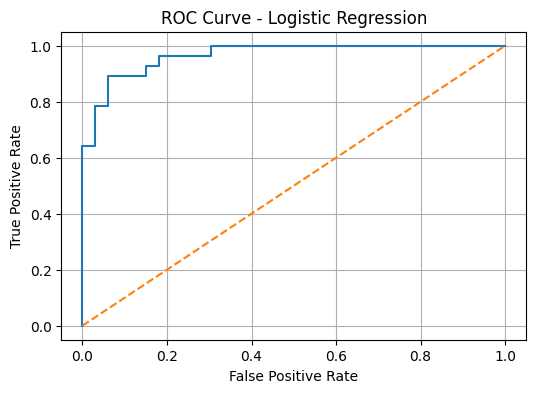

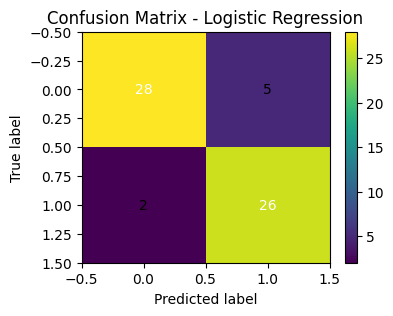


Model: Decision Tree
Accuracy: 0.7377
Precision: 0.6765
Recall: 0.8214
F1-score: 0.7419
ROC-AUC: 0.7440

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.68      0.82      0.74        28

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



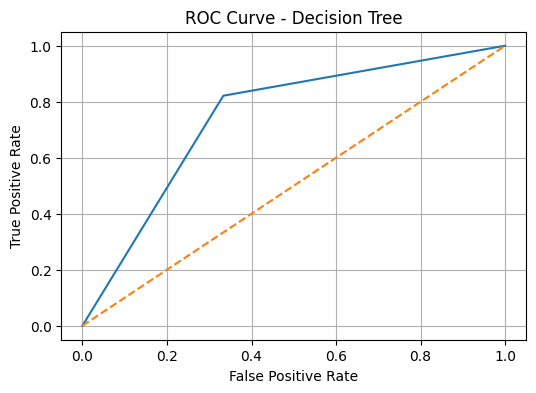

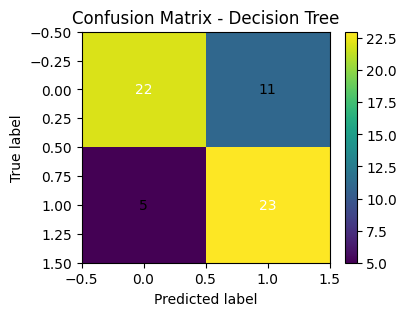


Model: Random Forest
Accuracy: 0.8689
Precision: 0.8125
Recall: 0.9286
F1-score: 0.8667
ROC-AUC: 0.9426

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



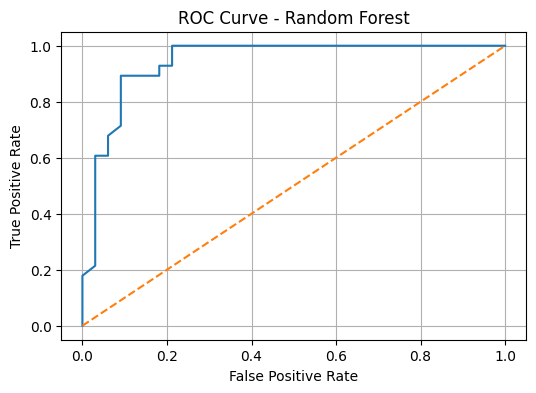

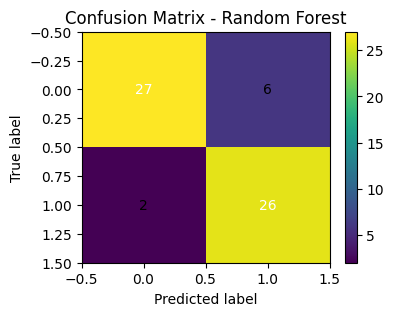


Model: SVM
Accuracy: 0.8852
Precision: 0.8387
Recall: 0.9286
F1-score: 0.8814
ROC-AUC: 0.9643

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



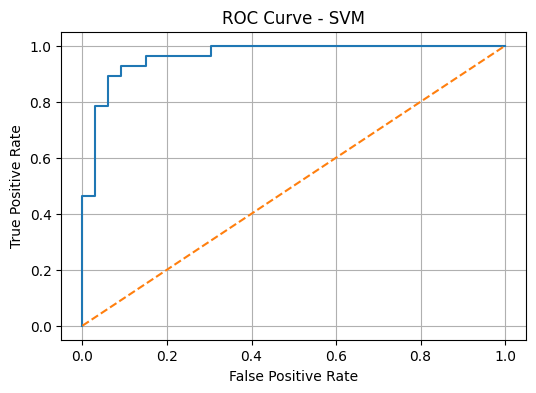

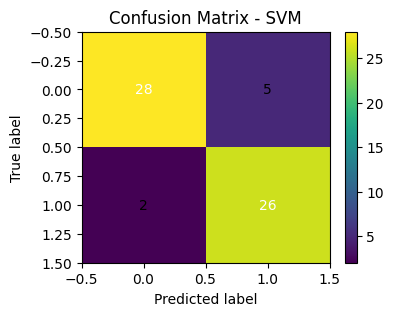


Model: KNN
Accuracy: 0.8852
Precision: 0.8621
Recall: 0.8929
F1-score: 0.8772
ROC-AUC: 0.9529

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



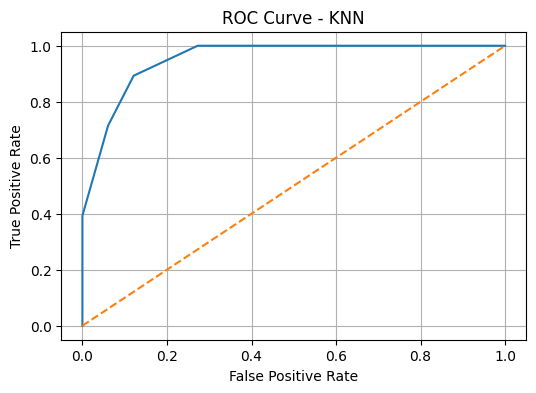

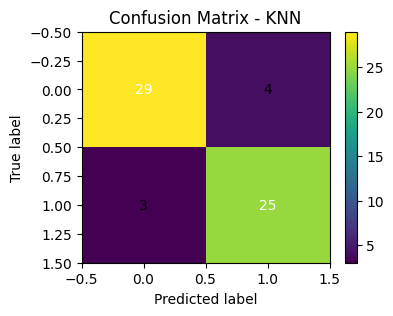

In [ ]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42, n_jobs=-1)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("KNN", KNeighborsClassifier())
]

fitted_pipelines = {}
results = []

for name, model in models:
    pipe, metrics = fit_and_evaluate_model(name, model, X_train, X_test, y_train, y_test)
    fitted_pipelines[name] = pipe
    results.append(metrics)

In [ ]:
results_df = pd.DataFrame(results).sort_values(by="roc_auc", ascending=False).reset_index(drop=True)
results_df


,name,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.885246,0.838710,0.928571,0.881356,0.966450
1,SVM,0.885246,0.838710,0.928571,0.881356,0.964286
2,KNN,0.885246,0.862069,0.892857,0.877193,0.952922
3,Random Forest,0.868852,0.812500,0.928571,0.866667,0.942641
4,Decision Tree,0.737705,0.676471,0.821429,0.741935,0.744048


In [ ]:
# Tune RandomForest quickly (small grid)
rf_param_grid = {
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [None, 5, 10]
}

rf_search = GridSearchCV(
    Pipeline(steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(random_state=42))]),
    rf_param_grid, cv=5, scoring="roc_auc", n_jobs=-1
)
rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_)
print("Best RF ROC-AUC (cv):", rf_search.best_score_)

# Tune SVM small grid
svm_param_grid = {
    "classifier__C": [0.1, 1],
    "classifier__kernel": ["rbf", "linear"]
}
svm_search = GridSearchCV(
    Pipeline(steps=[("preprocessor", preprocessor), ("classifier", SVC(probability=True, random_state=42))]),
    svm_param_grid, cv=5, scoring="roc_auc", n_jobs=-1
)
svm_search.fit(X_train, y_train)
print("Best SVM params:", svm_search.best_params_)
print("Best SVM ROC-AUC (cv):", svm_search.best_score_)

Best RF params: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best RF ROC-AUC (cv): 0.9028591376417463
Best SVM params: {'classifier__C': 0.1, 'classifier__kernel': 'linear'}
Best SVM ROC-AUC (cv): 0.8927209666340101



TUNED MODEL: Best RF (tuned)
name         Best RF (tuned)
accuracy            0.868852
precision           0.833333
recall              0.892857
f1                  0.862069
roc_auc             0.948052
dtype: object


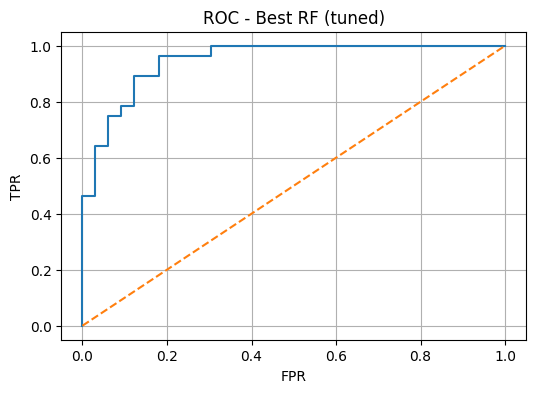


TUNED MODEL: Best SVM (tuned)
name         Best SVM (tuned)
accuracy             0.836066
precision                 0.8
recall               0.857143
f1                   0.827586
roc_auc              0.942641
dtype: object


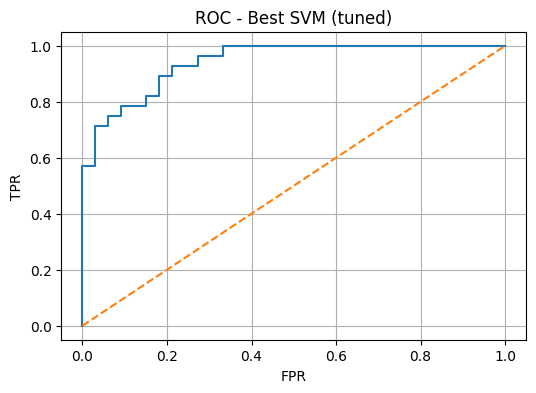

,name,accuracy,precision,recall,f1,roc_auc
0,Best RF (tuned),0.868852,0.833333,0.892857,0.862069,0.948052
1,Best SVM (tuned),0.836066,0.800000,0.857143,0.827586,0.942641


In [ ]:
# Choose best among baseline + tuned results
# We'll compare tuned RF and tuned SVM with previous best
candidates = {
    "Best RF (tuned)": rf_search.best_estimator_,
    "Best SVM (tuned)": svm_search.best_estimator_
}

tuned_results = []
for name, estimator in candidates.items():
    y_pred = estimator.predict(X_test)
    y_proba = estimator.predict_proba(X_test)[:, 1]
    metrics = {
        "name": name,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }
    tuned_results.append(metrics)
    print("\nTUNED MODEL:", name)
    print(pd.Series(metrics))
    # Plot ROC quickly
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],'--')
    plt.title(f"ROC - {name}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.grid(True)
    plt.show()

pd.DataFrame(tuned_results).sort_values(by="roc_auc", ascending=False)


Top 15 feature importances:
thal_3.0     0.115022
thal_7.0     0.096752
ca_0.0       0.093995
cp_4.0       0.093133
thalach      0.085656
oldpeak      0.064545
trestbps     0.048436
exang_1.0    0.047668
chol         0.045956
age          0.045097
exang_0.0    0.044824
slope_2.0    0.032508
slope_1.0    0.030357
sex_0.0      0.024592
sex_1.0      0.024088
dtype: float64


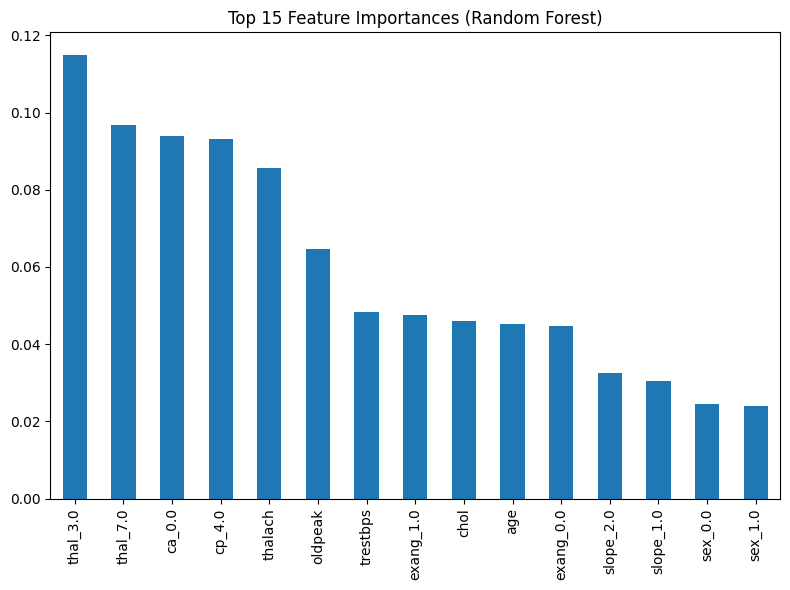

In [ ]:
# If we have a RandomForest pipeline from fitted_pipelines or rf_search
best_rf_pipe = None
if "Random Forest" in fitted_pipelines:
    best_rf_pipe = fitted_pipelines["Random Forest"]
# If tuned rf exists:
if hasattr(rf_search, "best_estimator_"):
    best_rf_pipe = rf_search.best_estimator_

if best_rf_pipe is not None:
    # Extract feature names after preprocessing
    # Numeric feature names:
    num_names = numeric_features
    # Categorical OneHotEncoder categories:
    ohe = best_rf_pipe.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot']
    cat_names = []
    # Build names carefully
    try:
        categories = ohe.categories_
        for col, cats in zip(categorical_features, categories):
            for cat in cats:
                cat_names.append(f"{col}_{cat}")
    except Exception:
        # fallback if we can't get categories
        cat_names = [f"cat_{i}" for i in range(len(categorical_features))]

    feature_names = num_names + cat_names

    # Get feature importances
    rf_model = best_rf_pipe.named_steps['classifier']
    importances = rf_model.feature_importances_
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    print("Top 15 feature importances:")
    print(feat_imp.head(15))

    plt.figure(figsize=(8,6))
    feat_imp.head(15).plot(kind='bar')
    plt.title("Top 15 Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()
else:
    print("Random Forest pipeline not found. Skipping feature importances.")


In [ ]:
# Choose the best model based on earlier results (example: best_rf_pipe if available)
best_model_pipe = None
# Prefer tuned rf, else fallback to best by roc in results_df
if 'best_estimator_' in dir(rf_search):
    best_model_pipe = rf_search.best_estimator_
elif results_df.iloc[0]['name'] in fitted_pipelines:
    best_model_pipe = fitted_pipelines[results_df.iloc[0]['name']]
else:
    # fallback: top pipeline from fitted_pipelines dictionary
    best_model_pipe = next(iter(fitted_pipelines.values()))

# Save to file
joblib.dump(best_model_pipe, "best_heart_model.pkl")
print("Saved model to best_heart_model.pkl")

# In Colab, provide download link (if desired)
from google.colab import files
files.download("best_heart_model.pkl")

Saved model to best_heart_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Example new patient data in dict form (replace with actual values)
new_patient = {
    "age": 60,
    "sex": 1,
    "cp": 2,
    "trestbps": 140,
    "chol": 240,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.5,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

new_df = pd.DataFrame([new_patient])
loaded_pipe = joblib.load("best_heart_model.pkl")
prob = loaded_pipe.predict_proba(new_df)[:, 1][0]
pred = loaded_pipe.predict(new_df)[0]
print(f"Predicted probability of heart disease: {prob:.3f}")
print("Predicted class (1=disease, 0=no disease):", int(pred))



Predicted probability of heart disease: 0.446
Predicted class (1=disease, 0=no disease): 0
